In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PNN import PNN
from GRNN import GRNN
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.datasets import load_iris, load_diabetes, load_digits
from torchvision.transforms import ToTensor
from torchvision.datasets import FashionMNIST
from torch import squeeze
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, r2_score

### PNN example

In [4]:
pnn = PNN(kernel="gaussian", sigma=0.5, n_classes=3, losses=[1,1,1])

In [5]:
df = load_iris(as_frame=True)
X = df['data'].to_numpy()
y = df['target'].to_numpy()

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.3)

In [7]:
print(X_train.shape)
print(X_test.shape)

print(y_train.shape)
print(y_test.shape)

(105, 4)
(45, 4)
(105,)
(45,)


In [8]:
pnn.fit(X_train, y_train)

preds = [pnn.predict([x_test]) for x_test in X_test]

In [9]:
accuracy_score(y_test, preds)

1.0

### GRNN example

In [11]:
df = load_diabetes(as_frame=True)
X = df['data'].to_numpy()
y = df['target'].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.3)

In [102]:
grnn = GRNN(kernel="gaussian", sigma=0.05)
grnn.fit(X_train, y_train)
preds = [grnn.predict(x_test) for x_test in X_test]
print(np.round(r2_score(y_test, preds), 2))

0.45


In [103]:
lr = LinearRegression()

lr.fit(X_train, y_train)
preds = lr.predict(X_test)

print(np.round(r2_score(y_test, preds), 2))

0.48


#### Regularized GRNN

In [119]:
grnn_l1 = GRNN(kernel="gaussian", sigma=0.05, regularization=['dropout', 'l1'], tau=0.5)
grnn_l1.fit(X_train, y_train)
preds = [grnn_l1.predict(x_test) for x_test in X_test]
print(np.round(r2_score(y_test, preds), 2))

0.46


### Digits

In [16]:
digits = load_digits(as_frame=True)
X = digits['data'].to_numpy()
y = digits['target'].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.3)

<Figure size 640x480 with 0 Axes>

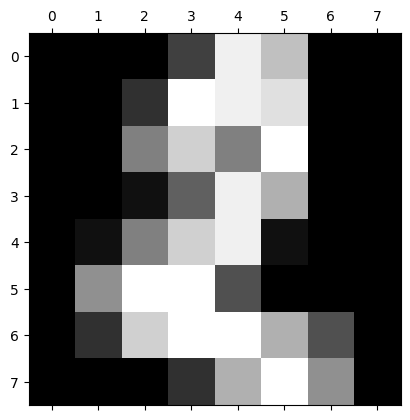

In [18]:
plt.gray()
plt.matshow(digits.images[2])

In [20]:
pnn = PNN(kernel="gaussian", sigma=0.8, n_classes=10, losses=[1]*10)

In [22]:
pnn.fit(X_train, y_train)

[0 1 2 3 4 5 6 7 8 9]


In [24]:
preds = [pnn.predict([x_test]) for x_test in X_test]

In [26]:
accuracy_score(y_test, preds)

0.9833333333333333